In [1]:
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import calendar

In [11]:
data_df = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present.csv')

In [12]:
filtered_data_df = data_df.filter(['Incident Datetime', 'Incident Day of Week', 'Incident Subcategory', 'Analysis Neighborhood', 'Intersection', 'Latitude', 'Longitude'], axis=1)
filtered_data_df['Incident Subcategory']=filtered_data_df['Incident Subcategory'].fillna('No cathegory')
filtered_data_df=filtered_data_df[filtered_data_df['Incident Subcategory'].str.contains("Vehicle")]   

In [13]:
filtered_data_df['Incident Datetime'] = pd.to_datetime(filtered_data_df['Incident Datetime'])

In [14]:
filtered_data_df['Incident hour'] = filtered_data_df['Incident Datetime'].apply(lambda x: x.hour)

In [15]:
filtered_data_df['Incident month'] = filtered_data_df['Incident Datetime'].apply(lambda x: x.month)

In [16]:
filtered_data_df['Incident Date'] = filtered_data_df['Incident Datetime'].dt.date

In [17]:
filtered_data_df=filtered_data_df.drop('Incident Datetime', axis =1)

In [18]:
hour_range_map = {
  0: "0-3",
  1: "4-7",
  2: "8-11",
  3: "12-15",
  4: "16-19",
  5: "20-23", 
}

In [19]:
filtered_data_df['hour_range'] = filtered_data_df['Incident hour'].apply(lambda x:hour_range_map[(int)(x/4)])

In [20]:
filtered_data_df.head()

,Incident Day of Week,Incident Subcategory,Analysis Neighborhood,Intersection,Latitude,Longitude,Incident hour,Incident month,Incident Date,hour_range
0,Saturday,Recovered Vehicle,NaN,NaN,NaN,NaN,8,8,2020-08-15,8-11
1,Saturday,Larceny - From Vehicle,NaN,NaN,NaN,NaN,9,8,2020-08-15,8-11
8,Friday,Larceny - From Vehicle,Japantown,HEMLOCK ST \ LAGUNA ST,37.786247,-122.428241,14,8,2020-08-14,12-15
20,Sunday,Recovered Vehicle,Bayview Hunters Point,YOSEMITE AVE \ INGALLS ST,37.724729,-122.387930,7,8,2020-08-16,4-7
32,Sunday,Recovered Vehicle,Bayview Hunters Point,FAIRFAX AVE \ NEWHALL ST,37.741297,-122.387143,13,8,2020-08-16,12-15


In [130]:
positive_df = filtered_data_df.filter(['Incident Date', 'Incident Day of Week', 'hour_range' , 'Analysis Neighborhood'], axis=1)


In [131]:
positive_df=positive_df.dropna()
positive_df['Incident occured'] =1
positive_df.head()

,Incident Date,Incident Day of Week,hour_range,Analysis Neighborhood,Incident occured
8,2020-08-14,Friday,12-15,Japantown,1
20,2020-08-16,Sunday,4-7,Bayview Hunters Point,1
32,2020-08-16,Sunday,12-15,Bayview Hunters Point,1
41,2020-08-16,Sunday,20-23,Financial District/South Beach,1
42,2020-08-16,Sunday,8-11,Mission,1


In [132]:
positive_df.shape

(92622, 5)

In [397]:
len(positive_df['Analysis Neighborhood'].unique())

41

In [127]:
from datetime import date, datetime, timedelta

def datespan(startDate, endDate, delta=timedelta(days=1)):
    currentDate = startDate
    while currentDate < endDate:
        yield currentDate
        currentDate += delta

In [128]:
hour_range = []
date =[]
day=[]

for timestamp in datespan(datetime(2018, 1, 1, 0, 0), 
                          datetime(2020, 10, 27, 1, 0), 
                          delta=timedelta(hours=4)):
    x= hour_range_map[(int)((timestamp.hour)/4)]
    hour_range.append(x)
    date.append(timestamp.date())
    day.append(calendar.day_name[timestamp.date().weekday()])
#     print (x , timestamp.date(),calendar.day_name[timestamp.date().weekday()])
    
negative_df = pd.DataFrame({'Incident Date': date,'Incident Day of Week':day,'hour_range':hour_range})

In [129]:
negative_df['Incident occured'] =0
negative_df.head(20)

,Incident Date,Incident Day of Week,hour_range,Incident occured
0,2018-01-01,Monday,0-3,0
1,2018-01-01,Monday,4-7,0
2,2018-01-01,Monday,8-11,0
3,2018-01-01,Monday,12-15,0
4,2018-01-01,Monday,16-19,0
5,2018-01-01,Monday,20-23,0
6,2018-01-02,Tuesday,0-3,0
7,2018-01-02,Tuesday,4-7,0
8,2018-01-02,Tuesday,8-11,0
9,2018-01-02,Tuesday,12-15,0


In [333]:
neighborhood_list = positive_df['Analysis Neighborhood'].unique().tolist()

In [334]:
negative_data = pd.DataFrame()
for neighborhood in neighborhood_list:
    negative_df['Analysis Neighborhood'] = neighborhood
    negative_data = pd.concat([negative_data,negative_df])

In [335]:
on = ['Incident Date', 'Incident Day of Week', 'hour_range', 'Analysis Neighborhood']

negative_data = (negative_data.merge(positive_df[on], on=on, how='left', indicator=True)
              .query('_merge == "left_only"').drop('_merge', 1))

In [336]:
positive_df.shape

(92622, 5)

In [337]:
negative_data.shape 

(192151, 5)

In [379]:
data = pd.concat([positive_df,negative_data])

In [380]:
data = data.sort_values(['Incident Date', 'Analysis Neighborhood','hour_range'])

In [381]:
data.head(5)

,Incident Date,Incident Day of Week,hour_range,Analysis Neighborhood,Incident occured
76286,2018-01-01,Monday,0-3,Bayview Hunters Point,1
23604,2018-01-01,Monday,12-15,Bayview Hunters Point,1
24968,2018-01-01,Monday,12-15,Bayview Hunters Point,1
235121,2018-01-01,Monday,12-15,Bayview Hunters Point,1
6772,2018-01-01,Monday,16-19,Bayview Hunters Point,0


In [382]:
data=data.drop('Incident Date', axis =1)

In [383]:
len(data.columns)

4

In [384]:
data['Incident occured'] = data['Incident occured'].astype('category')

In [385]:
data = pd.concat([data,pd.get_dummies(data[['Incident Day of Week', 'hour_range', 'Analysis Neighborhood']], sparse=True)],axis=1)

In [386]:
data.drop(['Incident Day of Week', 'hour_range', 'Analysis Neighborhood'],axis=1,inplace=True)

In [387]:
label = data.pop('Incident occured')

In [388]:
data['Incident occured'] = label

In [389]:
data.head()

,Incident Day of Week_Friday,Incident Day of Week_Monday,Incident Day of Week_Saturday,Incident Day of Week_Sunday,Incident Day of Week_Thursday,Incident Day of Week_Tuesday,Incident Day of Week_Wednesday,hour_range_0-3,hour_range_12-15,hour_range_16-19,...,Analysis Neighborhood_Seacliff,Analysis Neighborhood_South of Market,Analysis Neighborhood_Sunset/Parkside,Analysis Neighborhood_Tenderloin,Analysis Neighborhood_Treasure Island,Analysis Neighborhood_Twin Peaks,Analysis Neighborhood_Visitacion Valley,Analysis Neighborhood_West of Twin Peaks,Analysis Neighborhood_Western Addition,Incident occured
76286,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
23604,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
24968,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
235121,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6772,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [390]:

data.dtypes

Incident Day of Week_Friday                                uint8
Incident Day of Week_Monday                                uint8
Incident Day of Week_Saturday                              uint8
Incident Day of Week_Sunday                                uint8
Incident Day of Week_Thursday                              uint8
Incident Day of Week_Tuesday                               uint8
Incident Day of Week_Wednesday                             uint8
hour_range_0-3                                             uint8
hour_range_12-15                                           uint8
hour_range_16-19                                           uint8
hour_range_20-23                                           uint8
hour_range_4-7                                             uint8
hour_range_8-11                                            uint8
Analysis Neighborhood_Bayview Hunters Point                uint8
Analysis Neighborhood_Bernal Heights                       uint8
Analysis Neighborhood_Cas

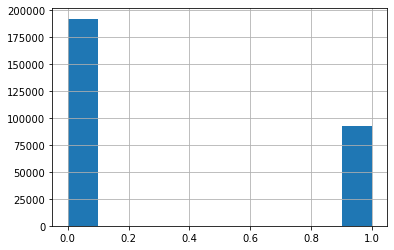

In [391]:
data['Incident occured'].hist()

In [353]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [392]:
data= data.sample(frac=1)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [393]:
X_train

,Incident Day of Week_Friday,Incident Day of Week_Monday,Incident Day of Week_Saturday,Incident Day of Week_Sunday,Incident Day of Week_Thursday,Incident Day of Week_Tuesday,Incident Day of Week_Wednesday,hour_range_0-3,hour_range_12-15,hour_range_16-19,...,Analysis Neighborhood_Russian Hill,Analysis Neighborhood_Seacliff,Analysis Neighborhood_South of Market,Analysis Neighborhood_Sunset/Parkside,Analysis Neighborhood_Tenderloin,Analysis Neighborhood_Treasure Island,Analysis Neighborhood_Twin Peaks,Analysis Neighborhood_Visitacion Valley,Analysis Neighborhood_West of Twin Peaks,Analysis Neighborhood_Western Addition
239886,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33856,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179107,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
322475,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187914,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299499,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
273075,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
99323,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
154108,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [394]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

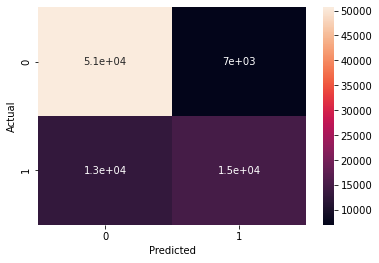

In [395]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [396]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.7678153385148422


In [363]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


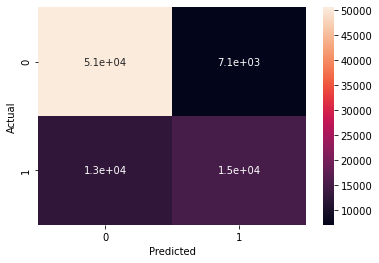

In [365]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [364]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.7693019009270531
